In [2]:
# Boilerplate at top of file
%load_ext autoreload
%load_ext rmagic
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from ggplot import *



from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

/usr/local/lib/python2.7/site-packages/IPython/extensions/rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


In [26]:
df_samp = pd.read_csv('data/merged/look_left.csv')

In [27]:
# Generate window at each point
def generate_windows(df, window=10, relative_columns = None):
    points = []
    cols = relative_columns
    if relative_columns == None:
        cols = df.columns.values
    for i, r in df.iterrows():
        w_start = i
        w_end   = min(i + 100, len(df)-1)
        row = r.to_dict()
        df_w = df.loc[w_start:w_end].reset_index(drop=True)
        for j in xrange(0,window):
            if j < len(df_w):
                window_row = df_w.loc[j].to_dict()
            else:
                window_row = None
            for c in cols:
                name = '%s_%s' % (c, j)
                row[name] = window_row[c] if window_row != None else None
        points.append(row)
        

    return pd.DataFrame(points)

def run_and_plot_kmeans(df, k):
    pca = PCA(n_components =2)
    kmean = KMeans(n_clusters=k)

    X = pca.fit_transform(df)
    Y = kmean.fit_predict(X)
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.title('PCA with Windowed Data and Kmeans (K = %s)'% k )
    return Y
df_w = generate_windows(df_samp.drop(['time'],axis=1), window=10)

In [28]:

# ks = [2,3,4,5,]
ks = [3]
for k in ks:
    df_s = df_samp.copy()
    Y = run_and_plot_kmeans(df_w[~df_w['noseX_9'].isnull()],k)
    null_case = [k]*(len(df_w) - len(Y))
    Y = np.hstack([Y, null_case])
    df_s['class'] = Y
    plt.figure()
    plt.scatter(df_s.index, df_s['noseX'], c=df_s['class'])
    plt.title('Data of Nose Position with Kmeans Clusters (K = %s)'% k)

KeyError: 'noseX_9'

In [188]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 3, 3,
       3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [132]:
df_w

,faceBottom,faceBottom_0,faceBottom_1,faceBottom_2,faceBottom_3,faceBottom_4,faceBottom_5,faceBottom_6,faceBottom_7,faceBottom_8,...,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9
0,146,146,147,147,147,148,145,146,148,149,...,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09
1,147,147,147,147,148,145,146,148,149,148,...,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09
2,147,147,147,148,145,146,148,149,148,148,...,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09
3,147,147,148,145,146,148,149,148,148,150,...,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09
4,148,148,145,146,148,149,148,148,150,148,...,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09
5,145,145,146,148,149,148,148,150,148,148,...,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09
6,146,146,148,149,148,148,150,148,148,147,...,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09
7,148,148,149,148,148,150,148,148,147,149,...,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09
8,149,149,148,148,150,148,148,147,149,149,...,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09
9,148,148,148,150,148,148,147,149,149,147,...,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09,1.448663e+09


# Testing the Algorithm on Multiple Turns

In [235]:
df_multi = pd.read_csv('data/multi_look/1448674388.csv')


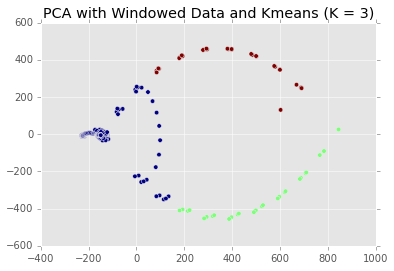

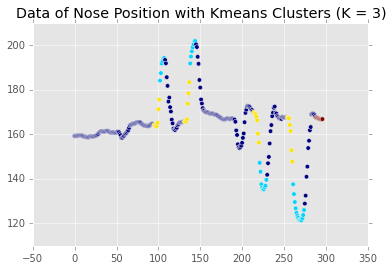

In [236]:
k = 3
df_w_multi = generate_windows(df_multi.drop(['time'],axis=1), window=10)
Y = run_and_plot_kmeans(df_w_multi[~df_w_multi['noseX_9'].isnull()],k)
null_case = [k]*(len(df_w_multi) - len(Y))
Y = np.hstack([Y, null_case])
df_w_multi['class'] = Y
plt.figure()
plt.scatter(df_w_multi.index, df_w_multi['noseX'], c=df_w_multi['class'])
plt.title('Data of Nose Position with Kmeans Clusters (K = %s)'% k)

In [243]:
df_dump.columns.values

array(['faceBottom', 'faceBottom_0', 'faceBottom_1', 'faceBottom_2',
       'faceBottom_3', 'faceBottom_4', 'faceLeft', 'faceLeft_0',
       'faceLeft_1', 'faceLeft_2', 'faceLeft_3', 'faceLeft_4', 'faceRight',
       'faceRight_0', 'faceRight_1', 'faceRight_2', 'faceRight_3',
       'faceRight_4', 'faceTop', 'faceTop_0', 'faceTop_1', 'faceTop_2',
       'faceTop_3', 'faceTop_4', 'isFrontFace', 'isFrontFace_0',
       'isFrontFace_1', 'isFrontFace_2', 'isFrontFace_3', 'isFrontFace_4',
       'noseX', 'noseX_0', 'noseX_1', 'noseX_2', 'noseX_3', 'noseX_4',
       'noseY', 'noseY_0', 'noseY_1', 'noseY_2', 'noseY_3', 'noseY_4',
       'time', 'class'], dtype=object)